<h1> Neural Networks </h1>

Neural networks are incredibly powerful machine learning models, and a good understanding of how they work, their limitations and their strengths, and what kinds of problems they are good at, is useful for anyone who wishes to learn about data science.

There are many different flavours of neural network, with some suited for images (Convolutional NNs), some for text and other sequenced data (Recurrent NNs) and some have recently begun to generate realistic images, some even from text descriptions:

![GANs](https://cdn-images-1.medium.com/max/1012/1*sIphVx4tqaXJxtnZNt3JWA.png)

![GANs2](https://i.kinja-img.com/gawker-media/image/upload/s--svWV1nJb--/c_scale,f_auto,fl_progressive,q_80,w_800/cgmfjzxrpo2r6jxprufr.png)

The people in the above photo are not real, they were generated by a type of network called a GAN. Think, as this technology progresses you could say to your computer "Give me a photo of Donald Trump/[Insert unpopular politician here] in a compromising scene" 

Neural networks were first conceived in the 1950s after scientists were learning how brains functioned. Thet noticed there were individual neurons that connected to each other through synapses. When a big enough electrical charge entered a neuron it would "fire" and send out a charge of its own.

Neurons had various synapses leading into it that meant that for most neurons to activate, they needed a pulse from many other neurons simultaniously. Artificial Neural Networks were built to mimic this with artificial neurons called perceptrons.

A perceptron is the building block of larger neural networks. This is a traditional deep feed forward neural network:
<img src="DNN.png">

A perceptron is a single one of these circles, enlarging one would look like this:
<img src="Perceptron.png">

You vectorise your data (Vector and array are mostly interchangeable) into individual features. A feature is something meaningful you can say about your data.
Suppose we were taking people and trying to determine how healthy they are. We could take a set of features about them like: [age, height, weight, gender...] to help us make this decision. In this example $x_1$ would be age, $x_2$ height etc...

Next up are the weights, denoted by $w_1$, $w_2$ ... plus an extra: $w_0$, called the "bias". These weight values are multiplied by their corresponding feature, essentially scaling them. The bias assumes a constant feature, usually 1 for simplicity.

The important thing about the weights is there is only one weight vector [$w_0$, $w_1$, ... , $w_n$] compared to however many feature vectors (or data points) we have. Every person's features are multiplied by the same weight vector. This forces the network to generalise to allow it to make predictions on future people rather than memorising its training data.

After all of these products are calculated, they all get summed by the Σ portion of the perceptron. This results in a single value per data point. 

This elementwise multiplication and summing has a name in maths, called the **dot product**. For example the dot product of [1, 0.5, 0] and [3, 1, 1] is:

1×3 + 0.5×1 + 0×1 = 3 + 0.5 + 0 = 3.5

Note that the two vectors must have the same **length**

This value is called the "Activation" which is passed into the activation function. Here is the one we'll be using:

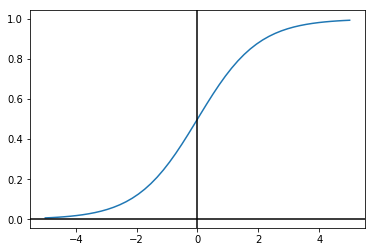

In [21]:
import numpy as np
from matplotlib import pyplot as plt

def sig(X):
    return 1/(1+np.exp(-X))

X = np.linspace(-5, 5)
Y = sig(X)
plt.plot(X, Y)
plt.axhline(0, color='black')
plt.axvline(0, color='black')
plt.show()

Above is the sigmoid, a popular activation function. Our X axis represents our activation value and the sigmoid maps this to some output value, which is bounded between 0 and 1.

As the activation becomes more positive, the sigmoid outputs closer and closer to 1, and vice versa. This can be interpreted as the probability that the data point that resulted in the activation value belongs to some class. 

And that's it! Weights scale your input, get summed, and the result is mapped to some other value (which in the case of the sigmoid can be considered the probability of a class). For regression you can completely skip out the activation function and use the raw activation value for your output.

Easy, now how do we get the right weight values such that our predictions are correct? Let's set up an example:

In [22]:
X = [[0, 0, 1],
     [0, 1, 1],
     [1, 0, 1],
     [1, 1, 1]]
D = [[0],
     [0],
     [0],
     [1]]
X = np.array(X)
D = np.array(D)
print(np.concatenate((X, D), axis=1))

[[0 0 1 0]
 [0 1 1 0]
 [1 0 1 0]
 [1 1 1 1]]


Here we have an AND gate. An AND gate computes a logical AND between two inputs, outputting a 1 if and only if both of its inputs are 1. 

In the above example, the first two columns are these inputs and the final column is the output. So for the first row we input [0, 0] and are returned [0], the final row takes [1, 1] and returns [1].

This 3rd column of all ones is for our **bias** (remember that it assumes a constant input, this is why it's always 1) The bias ensures that even if our input is all zeros, we can still output a non-zero answer. Think what the result of a dot product would be if one of the vectors was all 0.

Let's get our weights. We need a weight for each feature (including the bias) so we need 3 weights (remember this vector must be shared across all rows of X so we only need one row of weights)

In [23]:
W = np.random.uniform(-1, 1, (3, 1))
print(W)

[[-0.15253446]
 [ 0.75693338]
 [ 0.58141705]]


In [40]:
def use_perceptron(X, W):
    return sig(np.dot(X, W)) #"dot" stands for the dot product

In [41]:
Y = use_perceptron(X, W)
print(Y)

[[  2.05250322e-04]
 [  4.97253758e-02]
 [  4.97246543e-02]
 [  9.30253405e-01]]


Look at that, we have a value for each data point! Except we're way off of our **D**esired output **D**. Just how wrong are we? Let's define an **error function** to quantify this.

We will use a **mean squared error** function that squares the difference between each value (sqaured so that opposite errors don't cancel each other out)

In [42]:
def calc_error(D, Y):
    return np.sum(0.5*(D-Y)**2)/len(D)

In [43]:
print(calc_error(D, Y))

0.00122622298756


We want to **minimise** this error, since lower error means our output Y is closer to our desired D. We need the right values of W that result in the best values of Y!

Let's fix two of our weights and see what happens as we adjust one of them:

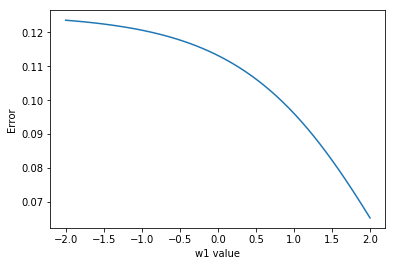

In [44]:
w0 = np.linspace(-2, 2)
errors = []
for w in w0:
    W[0] = w
    Y = use_perceptron(X, W)
    error = calc_error(D, Y)
    errors.append(error)
plt.plot(w0, errors)
plt.xlabel("w1 value")
plt.ylabel("Error")
plt.show()

There's a point on our graph where the error is at its lowest! We could do this for all of our weights, setting their value to the one corresponding to the lowest error. However weights are not **independant**! Changing one affects the error curve of another. Look what happens to the surface when we add another dimension in:

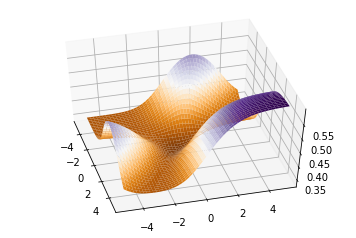

In [29]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
w0 = np.linspace(-5, 5)
w1 = np.linspace(-5, 5)
errors = np.zeros((50, 50))
x = 0
y = 0
for w_0 in w0:
    for w_1 in w1:
        W[0] = w_0
        W[1] = w_1
        Y = use_perceptron(X, W)
        error = calc_error(D, Y)
        errors[x][y] = error
        y+=1
    y=0
    x+=1

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
w0, w1 = np.meshgrid(w0, w1)
ax.plot_surface(w0, w1, errors, cmap=cm.PuOr)
ax.view_init(50, -15)
plt.show()

A bit more complex, but we can still see the lowest point in the center there. Except, there's one more weight to consider... and we've run out of dimensions... We need a better way.

Imagine we've plopped a blind person onto this hilly landscape in a random location (Their position described by their weight values) And told them to walk down the hill. How might they do it?

They could feel with their feet which way the hill is sloping, feel which way is down, and take a step in that direction:

<img src="GD1.png">
Feel which way goes down at $w_1$ = 1.1
<img src="GD2.png">
Take a step in that direction
<img src="GD3.png">
Our $w_1$ is now around 0.7, let's see which way to go now.
<img src="GD4.png">
Take another step
<img src="GD5.png">
repeat until no more steps to take... Here we would finish at ~$w_1$ = 0.5

In 2 dimensions it's the same, just with steps taking us potentially in both weight directions. This scales up nicely in as many dimensions as we want! So how do we know which way the slope is pointing?

![calc](https://rlv.zcache.ca/warning_calculus_postcard-rf88f1cfd168246b0b8573b9f4a7bd7c3_vgbaq_8byvr_324.jpg)

Don't worry I won't go into how we derive this formula, just know that for any function (like our error function from before) We can describe the way the function changes with respect to its inputs. In this case we need to know how our error would change with respect to a change in our weights. 

Skipping the maths, our direction can be given by:

**(D-Y)(X)**

Or rather, the difference in our actual prediction and our desired output, multiplied by the data point X that resulted in the prediction! Simple. That means to improve W, we just need to subtract this gradient (because we're going down, the gradient points up) from the current weight vector!

<h1>The Learning Rate - Eta</h1>

One more thing, we scale this step by what's called the learning rate. A small learning rate = a smaller, more timid step, and a larger learning rate = a huge step. Large steps can intruduce unpredictability, since the gradient may be different after you've taken your step.

Usually a low learning rate, around 0.1,  will suffice.

And that's it! All in all we can now define our training loop as follows:

In [31]:
n_epochs = 100
eta = 0.1
for epoch in range(n_epochs):
    Y = use_perceptron(X, W)
    W += eta*np.dot(((D-Y).T), X).T

The main bulk of this is just **three lines of code!** Let's put that in a method:

In [32]:
def train_perceptron(X, D, W, n_epochs=100, eta=0.1):
    for epoch in range(n_epochs):
        Y = use_perceptron(X, W)
        W += eta*np.dot(((D-Y).T), X).T
    return W

And train one:

In [45]:
W = np.random.uniform(-1, 1, (3, 1))
W = train_perceptron(X, D, W)
print(use_perceptron(X, W))

[[ 0.05130043]
 [ 0.24861306]
 [ 0.22674388]
 [ 0.64212073]]


With only 100 loops, the values are approaching their desired values of 0, 0, 0, 1. Running this for longer will increase accuracy:

In [46]:
W = np.random.uniform(-1, 1, (3, 1))
W = train_perceptron(X, D, W, n_epochs=1000)
Y = use_perceptron(X, W)
print(Y)

[[  1.98150247e-04]
 [  4.91776605e-02]
 [  4.91780057e-02]
 [  9.31023501e-01]]


Since a sigmoid cannot output exactly 1 or 0, adding more epochs will get these values infinitessimally closer, but never exact. So a decision could be made on the value, if > 0.5 then return 1 (or true), else 0 (false):

In [39]:
print(Y>0.5)

[[False]
 [False]
 [False]
 [ True]]


For a more interesting ML problem, look through the Amazon review notebook. This example doesn't deal with generalising to future, unseen data points.

For any extra questions just slack me (@samk) or bother me in person